In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm    # 통계적 모델과 테스트 방법을 제공하는 라이브러리
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load AirPassengers dataset
data = sm.datasets.get_rdataset("AirPassengers").data
# 1949년부터 1960년까지 매월 항공기 탑승객 수

In [ ]:
# Add time column
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
print(data)

          time  value
0   1949-01-31    112
1   1949-02-28    118
2   1949-03-31    132
3   1949-04-30    129
4   1949-05-31    121
..         ...    ...
139 1960-08-31    606
140 1960-09-30    508
141 1960-10-31    461
142 1960-11-30    390
143 1960-12-31    432

[144 rows x 2 columns]


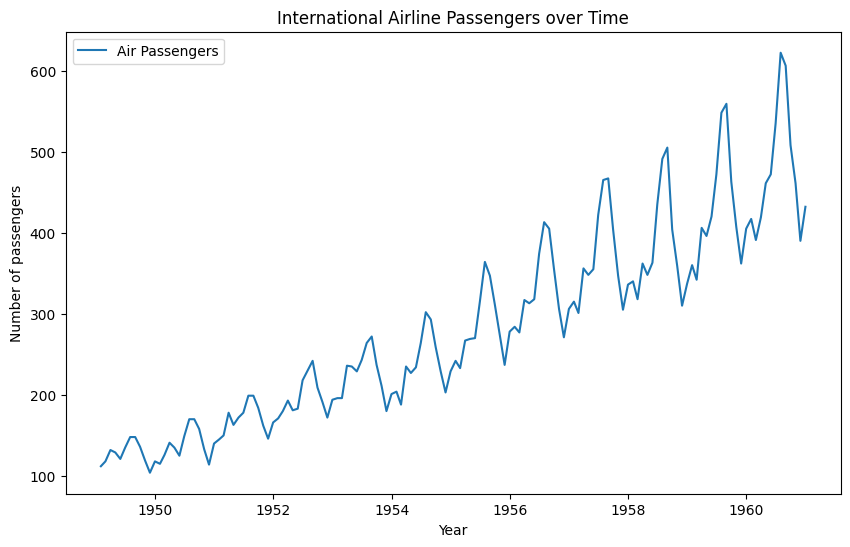

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['value'], label='Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('International Airline Passengers over Time')
plt.legend()
plt.show()

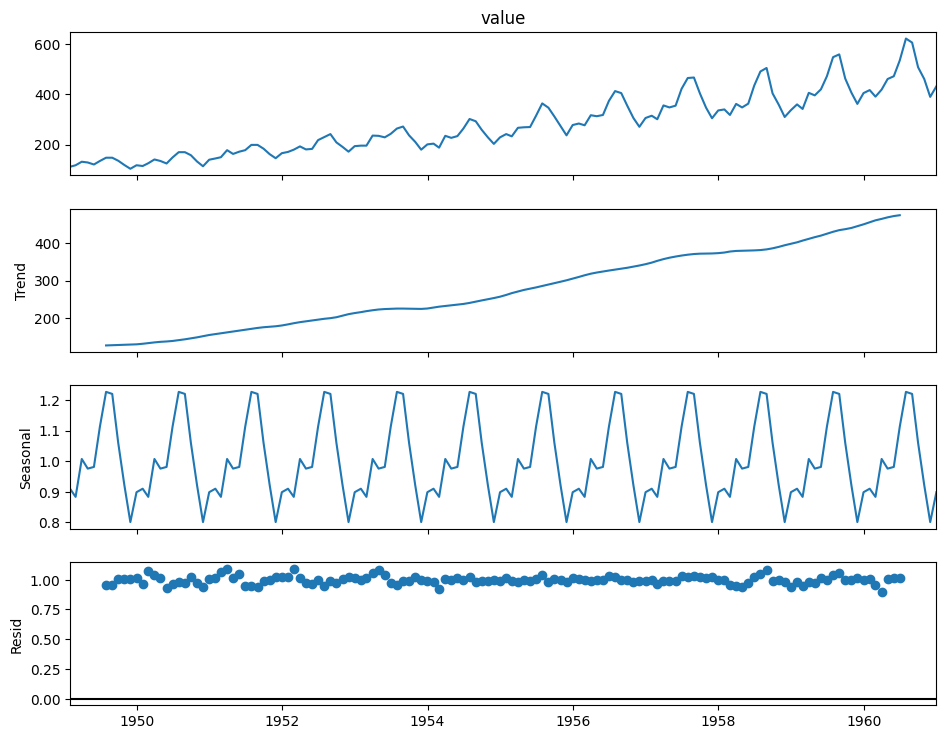

In [ ]:
# Set time column as index
ts = data.set_index('time')['value']

# Decompose trend, seasonality, and residual
result = sm.tsa.seasonal_decompose(ts, model='multiplicative')

# Visualize the result
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


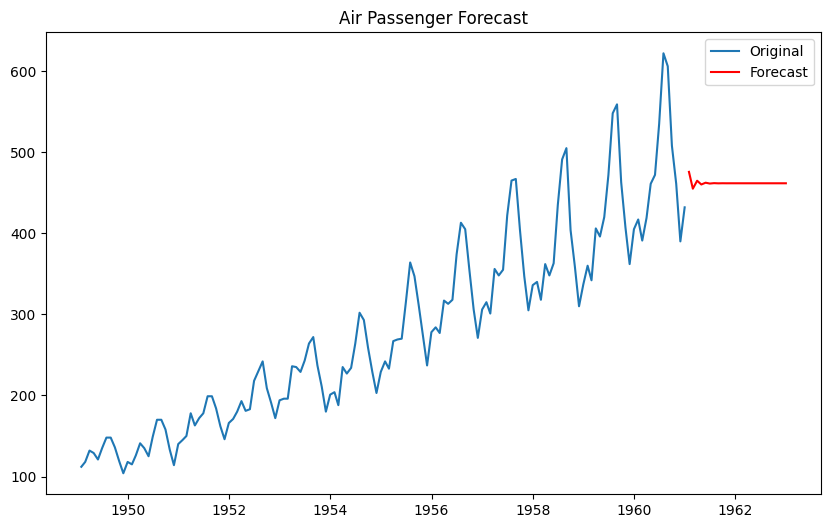

In [ ]:
# Initialize ARIMA model
model = ARIMA(ts, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Forecast number of passengers in next 24 months
forecast = model_fit.forecast(steps=24)

# Visualize the result
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Air Passenger Forecast')
plt.show()